BINIAM ABEBE

CNN for image Recognition with MNIST Dataset

In [58]:
import numpy as np
import pandas as pd

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
import tensorflow as tf

In [61]:
#version check
print(tf.__version__)

1.15.5


In [62]:
#load minst dataset from tensorflow example
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True);


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [63]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [64]:
# Check data shapes
print(mnist.train.images.shape)
print(mnist.test.images.shape)

(55000, 784)
(10000, 784)


Initialize weights in Filter

In [65]:
# Initialize weights in Filter
def initialize_weights(filter_shape):
    """
    Initializes the weights of a neural network filter.

    Args:
        filter_shape (tuple): The shape of the filter weights.

    Returns:
        tf.Variable: The initialized filter weights.
    """
    init_random_dist = tf.truncated_normal(filter_shape, stddev=0.1)
    return tf.Variable(init_random_dist)

Initialize bias

In [66]:
# Initialize bias
def initialize_bias(bias_shape):
    """
    Initializes the bias of a neural network layer.

    Args:
        bias_shape (tuple): The shape of the bias.

    Returns:
        tf.Variable: The initialized bias.
    """
    initial_bias_vals = tf.constant(0.1, shape=bias_shape)
    return tf.Variable(initial_bias_vals)

set up Convlutional Layer and Perform Convolution Computation

In [67]:
# Set up Convolutional Layer and Perform Convolution Computation
def create_conv_layer(input_data, filter_shape):
    """
    Creates a convolutional layer in a neural network.

    Args:
        input_data (tf.Tensor): The input to the layer.
        filter_shape (tuple): The shape of the filter weights.

    Returns:
        tf.Tensor: The output of the layer.
    """
    filter_weights = initialize_weights(filter_shape)
    conv_layer_output = tf.nn.conv2d(input=input_data, filter=filter_weights, strides=[1, 1, 1, 1], padding='SAME')
    return conv_layer_output


set up a Relu Layer and Perform Computation : Dot Product + Bias (x.w + b)

In [68]:
# Set up a Relu Layer and Perform Computation: Dot Product + Bias
def create_relu_layer(conv_layer_output, bias_shape):
    """
    Creates a ReLU activation layer.

    Args:
        conv_layer_output (tf.Tensor): The output from the convolutional layer.
        bias_shape (tuple): The shape of the bias.

    Returns:
        tf.Tensor: The output after applying ReLU activation.
    """
    biases = initialize_bias(bias_shape)
    relu_output = tf.nn.relu(conv_layer_output + biases)
    return relu_output

Set up a Pooling Layer and reduce Spatial size

In [69]:
# create max_pooling_layer
def create_max_pooling_layer(input_data):
    """
    Creates a max pooling layer in a neural network.

    Args:
        input_data (tf.Tensor): The input to the layer.

    Returns:
        tf.Tensor: The output of the layer.

    """
    return tf.nn.max_pool(input_data, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

Setup Fully Connected Layer and Perform Computatin: (input * weights) + Bias

In [70]:
# Create Fully Connected Layer
def create_fully_connected_layer(input_layer, output_size):
    """
    Creates a fully connected layer in a neural network.

    Args:
        input_layer (tf.Tensor): The input to the layer.
        output_size (int): The number of output units.

    Returns:
        tf.Tensor: The output of the layer.
    """
    input_size = int(input_layer.get_shape()[1])
    weights = initialize_weights([input_size, output_size])
    biases = initialize_bias([output_size])
    fully_connected_output = tf.matmul(input_layer, weights) + biases
    return fully_connected_output

Phase I : Build the Convolution Neural Network

Create placeholders for inputs and Labels : x & y_true

In [71]:
#place holder for input data
x = tf.placeholder(tf.float32, shape=[None, 784])

In [72]:
# place holder for y
y_true = tf.placeholder(tf.float32, shape=[None, 10])

Reshape the Input Placeholder X

In [73]:
#reshape the input data
x_image = tf.reshape(x, [-1, 28, 28, 1])

Create 1st Convlutional Layer,ReLu Layer and perform Computation : x*W +b

In [74]:
# create first convolutional layer
# Convolutional Layer 1
conv_layer1 = create_conv_layer(x_image, filter_shape=[5, 5, 1, 32])
relu_layer1 = create_relu_layer(conv_layer1, bias_shape=[32])

Create 1st Pooling Layer and Reduce Spatial size

In [76]:
# create first max pooling layer
max_pooling_layer_1 = create_max_pooling_layer(relu_layer1)

Create 2nd Pooling Layer and Reduce Spatial size

In [77]:
# Pooling Layer 1
max_pool_1 = tf.nn.max_pool(relu_layer1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


Reshape/Flatten Data Making it Ready to be Fed into 1st fc Layer

In [78]:
# reshape the max pooling layer
flattened = tf.reshape(max_pool_1, [-1, 14*14*32])

Create 1st FC Layer, Relu Layer , and output Data to Dropout Layer

In [79]:
# Fully Connected Layer 1
fully_connected_layer1 = create_fully_connected_layer(flattened, output_size=1024)


Create Dropput Layer and Dropput a fraction of output Randomly

In [80]:
# Dropout Layer
keep_prob = tf.placeholder(tf.float32)
dropout_layer = tf.nn.dropout(fully_connected_layer1, keep_prob=keep_prob)

Create Final FC Layer, Compute (x.W + B), and Produce Finale Ouptus

In [81]:
# create second fully connected layer as pred
y_pred = create_fully_connected_layer(dropout_layer, output_size=10)

Define Loss Function and Calaculate softmax Cross Entropy Loss

In [82]:
# Define Loss Function and Calculate Softmax Cross Entropy Loss
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

Create an optimizer

In [83]:
#get optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)

Create a Trainer to Traing CNN Model

In [84]:
#create train step
train = optimizer.minimize(cross_entropy)

Train and Test CNN Deep Learning Model on MNIST Dataset

Initalize all Variables

In [85]:
#initialize variables
init = tf.global_variables_initializer()

In [86]:
# steps
steps = 5000

In [87]:
# To store the results
results = {'step': [], 'accuracy': []}

Run tf.sessioon () to Train and Test Deep Learning CNN Model

In [91]:
# create session and run the model 
with tf.Session() as sess:

    # initialize the session
    sess.run(init)
    
    for i in range(steps):
        # get the next batch of data from mnist dataset 
        batch_x, batch_y = mnist.train.next_batch(50)
        
        # run the train step
        sess.run(train, feed_dict={x: batch_x, y_true: batch_y, keep_prob: 0.5})

        # print out a message every 100 steps

        if i % 100 == 0:
            print('Currently on step {}'.format(i))

            # Test the Train Model
            matchs = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))

            # convert matchs to float32 and calculate mean
            # to get the accuracy
            accuracy = tf.reduce_mean(tf.cast(matchs, tf.float32))

            # test the model at 100 steps
            test_accuracy = sess.run(accuracy, feed_dict={x: mnist.test.images, \
                                                           y_true: mnist.test.labels, \
                                                           keep_prob: 1.0})
            # print acuracy
            print('Accuracy is:', test_accuracy)
            print('\n')  
            
            # Store the results
            results['step'].append(i)
            results['accuracy'].append(test_accuracy)            

Currently on step 0
Accuracy is: 0.101


Currently on step 100
Accuracy is: 0.9026


Currently on step 200
Accuracy is: 0.9249


Currently on step 300
Accuracy is: 0.9441


Currently on step 400
Accuracy is: 0.9579


Currently on step 500
Accuracy is: 0.9619


Currently on step 600
Accuracy is: 0.9717


Currently on step 700
Accuracy is: 0.9729


Currently on step 800
Accuracy is: 0.9767


Currently on step 900
Accuracy is: 0.9757


Currently on step 1000
Accuracy is: 0.9771


Currently on step 1100
Accuracy is: 0.9795


Currently on step 1200
Accuracy is: 0.981


Currently on step 1300
Accuracy is: 0.9792


Currently on step 1400
Accuracy is: 0.9812


Currently on step 1500
Accuracy is: 0.984


Currently on step 1600
Accuracy is: 0.9838


Currently on step 1700
Accuracy is: 0.9838


Currently on step 1800
Accuracy is: 0.9825


Currently on step 1900
Accuracy is: 0.9848


Currently on step 2000
Accuracy is: 0.9853


Currently on step 2100
Accuracy is: 0.9834


Currently on step 2200
Ac

In [92]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

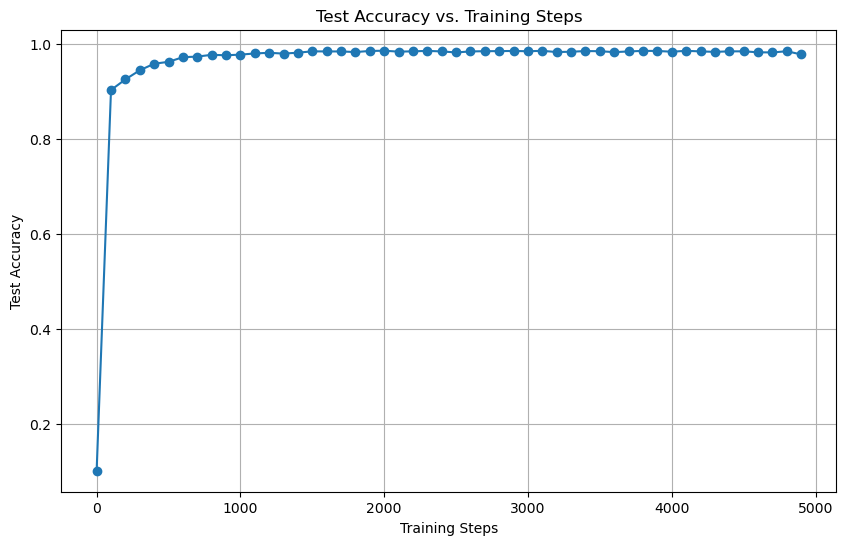

In [93]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(results_df['step'], results_df['accuracy'], marker='o')
plt.title('Test Accuracy vs. Training Steps')
plt.xlabel('Training Steps')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()